# School of Electrical and Information Engineering
### University of the Witwatersrand, Johannesburg
### ELEN4022 — Full Stack Quantum Computing

# The Quantum Fourier Transform Tutorial

# Introduction

Quantum computing is one of the fastest emerging technologies with a promise to solve incomprehensable problems. This technology is already revolutionising the way modern day computing is viewed. It has, and continuous to push the boundaries of technology in various fields. However this technology is novel and faces a lot of challenges and limitations. The ability to comprehend this cutting edge technology is of utmost important for young engineers, especially those in that straddle between hardware and software. Quantum computing is the key to unlock a new world of information technology [1].

Quantum Computing is a physical device that exploits quantum states to perform various computations expressed as a mathematical models. These models describe the evolution of the physical realisation of the computation. The most common model of quantum computation is described as a network of quantum logic gates [1]. 


This document serves as fundamental introduction to quantum computing and reviews the basic paradigms of quantum qubits and quantum gates. The objective is to provide basic building blocks into implementing algorithms most common in engineering. To appreciate the depth of  a renewed understanding of Fourier Transforms in the quantum realm.

Mathematical models using the Python programming language are presented to offer a deeper understanding of the quantum postulate.The concept of a qubit is presented in the computational bases. Fundamental quantum gates are developed using the concepts of linear algebra. These techniques are used to implement a Quantum Fourier Transform. It is assumed that the reader has a reasonable grasp on linear algebra. Some basics of quantum mechanics is assumed but not absolutely neccesary.

# The Qubit

The qubit is the quantum analogue of the well known classical bit. The qubit is a mathemaical object or construct with specific properties that represent the fundamental unit of information in a quantum realm. The Bloch sphere is the geometrical representation of the state space of a qubit, figure [7] below illustrates. 


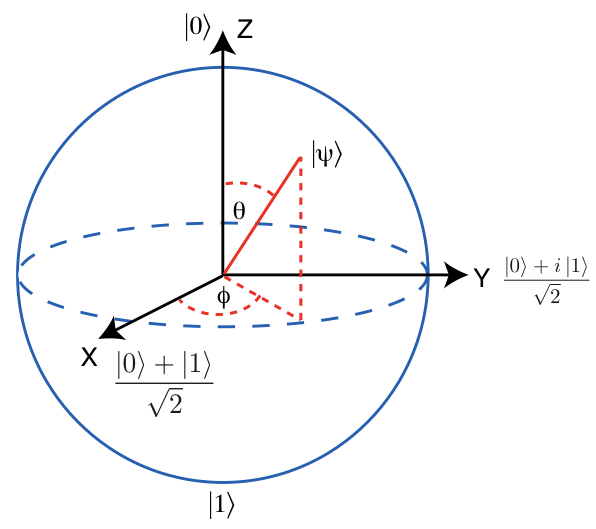




The Bloch sphere represents the quantum theory that a single qubit can store an infinite amount of information i.e. the unmeasured qubit stores information conserved by the dynamic evolution of Schrondingers equation. Mathematically, this represents  antipodal points of mutually orthogonal state vectors [2].

The state of a qubit is generally represented as a vector in a two-dimensional complex Hilbert space often denoted as 

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}$$


where $\alpha$ and $\beta$ are complex numbers. The qubit has two possible states usually respresented as a column vector, 

$$
\left|0\right\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$$


$$
\left|1\right\rangle =  
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$$


These states can also be represented in a linear mathematical functional form. This introduces the **bra-ket notation**. This is particularly useful in the **Hilbert** spaces which have an inner product that lends itself to **Hermitian** conjugation and presents a vector with a linear functional. Simply put, the **bra** and **ket** represent a row and column vector respectively. This convention allow bras, kets and linear operations to imply matrix multiplication, i.e. the inner product is a column vector multiplied by a row vector. This can be represented programmatically using arrays using Numpy. In Python, we can ecapsulate this representation as a subclass of the Qubit and it's state [2]. 









<!-- The state of a qubit may be represented as a column vector, and conventionally

<!-- $$
\left|0\right\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix}.
$$ --> 





The qubit is the fundational building block of quantum computations. The behaviour of qubits is better experienced rather than providing a convoluted explaination.

# The Quantum Gate

Quantum gate are the logical units in quantum computing and are implemented as unitary matrix operations that perform rotational manipulations in the Bloch Sphere. Unitary matrices simply perform transformations on qubits while preserving the angle between them. Quantum gates can operator on one or more states. The action of a quantum gate on a single qubit is defined as a matrix mulitplication of the unitary matrix and vector as illustrated below

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

where $U$ represents a unitary matrix relative to some basis, in this case the computational bases. A gate that acts on $n$ qubits is represented by a $2^n x 2^n$ unitary matrix. An infinite number of gates are possible, the most common gates will be explored. This will be used as building blocks to construct more complex gates [1,2]. 


>## Single-QuBit Gate


>A gate acting upon a single qubit is represented by a $2 \times 2 $ unitary matrix $U$, where $U$ in general is:

>$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix} = U(\theta, \phi, \lambda)  .
$$


<!-- >#### The Pauli X Gates
>The X-gate, also know as the bit-flip or qunatum NOT operation, is defined by

>$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= |0\rangle\langle1|+|1\rangle\langle0| =  U(\pi,0,\pi)
$$

>This simply means that if a qubit is in state $0$ then  rotate to state $1$ and vice-versa, a $\pi$ rotation on the Bloch sphere.
 -->


>#### The Identity Gate
>The identity gate is a single qubit gate that leaves the bases states unchanged 

>$$
I   =  
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
$$

> This gate defines  a none operation on a state. It is useful for error checking on hardware and some basic operation validation i.e. a single qubit gate is it's own inverse [3].

>#### The Hamard Gates
>The Harmad gate is a single qubit gate that transforms the bases states within the Block sphere, it is defined by ,

>$$
H   = \frac{1}{\sqrt2}  
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}=  U(0,\pi)
$$

> This gate defines a rotation around the Bloch sphere. It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt(2)}$ and $|1\rangle$ to $\frac{|0\rangle - |1\rangle}{\sqrt(2)}$. This simply means that the measurement will have probabilities also known as superposition. This is represented as a $\pi$ rotation about the $\frac{x+z}{\sqrt2}$ axis on the Block sphere [2]. 

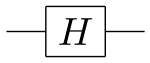

>#### The Phase shift Gates
> The phase shift gate maps the basis states $|0\rangle \rightarrow$ and $|1\rangle \rightarrow e^{i\varphi}|1\rangle$. The gate is defined by the following matrix

>$$
P(\varphi)   =
\begin{pmatrix}
1 & 0\\
0 & e^{i\varphi}
\end{pmatrix}
$$

> This gate defines a rotation around the Bloch sphere specified by $\varphi$. It performs a rotation of $\varphi$ around the Z-axis. This simply means that it leaves the probability of measuring $|0\rangle$ or $|1\rangle$ unchanged but modifies the phase [2,3].

># Multi-QBit Gate
As the name implies a multi-qubit gate is  a quantum gate that acts upon multiple qubits.
The simpliest of the 2 qubit gates is the swap gate. It essentially exchanges two qubits. It's matrix representation is defined by


>$$\begin{equation}
	SWAP = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & 0 & 1 & 0 \\
	0 & 1 & 1 & 0 \\
	0 & 0 &0 & 1
		\end{pmatrix}.
\end{equation}$$

>This gate transforms the basis $|01\rangle$ to $|10\rangle$ etc. There circuit representation is shown below.

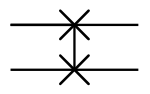

>### The Controlled Quantum Gate
Controlled type gates perform action dependent operation. More specifically a controlled two-qubit gate $C_{U}$ applies a unitary $U$ to a second qubit when the state of the first is $\left|1\right\rangle$, where $C_{U}$ 

>$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

>when the `control` is the MSB and

>$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$


>when the `control` is the LSB




A general circuit representation of a control gate is shown below.

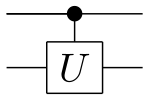


>A more intuitive way of conceptualizing this operation is to define a quantum if-statement represented by projects of the form $P_{0} =|0\rangle\langle0|$ and $P_{1} = |1\rangle\langle1|$. Extending this convention to define $C_{U} = P_{0} \otimes I + P_{1} \otimes U$, where $\otimes$ is the kronecker product , $I$ is the indentity operator and $U$ is an arbitary quantum gate. 



>This convention allows a general 2-qubit control gate that acts on an arbitrary number of states to be defined as follows: 

<div style="background-color:rgba(0, 0, 0, 0); padding:10px 0;font-family:monospace;font-family:monospace;">
    
    
><font color = "orange">while</font> index is less than number of qubits<br> 

>&nbsp;&nbsp;&nbsp;&nbsp; <font color = "orange">if</font> index is control<br>

>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; control matrix is tensored with identity matrix<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target matrix is tensored with quantum gate

>&nbsp;&nbsp;&nbsp;&nbsp; <font color = "orange">else if</font> index is target<br>

>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; control matrix is tensored  P<sub>1</sub> projector<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target matrix is tensored  P<sub>0</sub> projector

>&nbsp;&nbsp;&nbsp;&nbsp; <font color = "orange">else</font><br> 
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; control matrix is tensored with  identitty matrix<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target matrix is tensored with  identitty matrix

>&nbsp;&nbsp;&nbsp;increment index

>control gate = control matrix + target matrix<br>
><font color = "orange">return</font> control gate 


<!-- >### The Controlled-X Gate
The controlled-not, denoted $C_{X}$, gate flips the `target` qubit if the `control` is in the state $\left|1\right\rangle$; where

>$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

>when the `control` is the MSB and

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

>when the `control` is the LSB
  -->

<!-- >A more intuitive way of conceptualizing this operation is to define a quantum if-statement represented by projects of the form $P_{0} =|0\rangle\langle0|$ and $P_{1} = |1\rangle\langle1|$. Extending this convention to define $C_{X} = P_{0} \otimes I + P_{1} \otimes X$, where $\otimes$ is the kronecker product , $I$ is the indentity operator and $X$ is the pauli X gate defined above. 



>This convention allows a general 2-qubit control gate that acts on an arbitrary number of states to be defined as follows: 

<div style="background-color:rgba(0, 0, 0, 0); padding:10px 0;font-family:monospace;font-family:monospace;">
    
    
><font color = "orange">while</font> index is less than number of qubits<br> 

>&nbsp;&nbsp;&nbsp;&nbsp; <font color = "orange">if</font> index is control<br>

>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; control matrix is tensored with identity matrix<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target matrix is tensored with quantum gate

>&nbsp;&nbsp;&nbsp;&nbsp; <font color = "orange">else if</font> index is target<br>

>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; control matrix is tensored  P<sub>1</sub> projector<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target matrix is tensored  P<sub>0</sub> projector

>&nbsp;&nbsp;&nbsp;&nbsp; <font color = "orange">else</font><br> 
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; control matrix is tensored with  identitty matrix<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target matrix is tensored with  identitty matrix

>&nbsp;&nbsp;&nbsp;increment index

>control gate = control matrix + target matrix<br>
><font color = "orange">return</font> control gate 
 -->

>### The Controlled-Phase Shift Gate
The controlled-phase, denoted $C_{PHASE(\varphi)}$, is mathematically represented below,

>$$
C_{PHASE(\varphi)}= 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & e^{i\varphi}\\
\end{pmatrix}. 
$$

>This gate performs a conditional phase rotation of $\varphi$ around the Z-axis.


# Quantum Algorithms

A quantum algorithm is a finite set of inherently quantum instructions performed on a qunatum computer. Quantum algorithms have the ability to exploit quantum states such as entanglement and superposition to solve a given problem usually magnitudes faster than a classical computer. Quantum supremacy is the objective of demonstrating algorithms implemented on a quantum environment that solve particular problems in a finite and feasible time period [4]. 

The Quantum Fourier Transform (QFT) is a linear transformation on qubits and is a component of many quantum algorithms such as Shor's algorithm [4]. 





# The QFT

The Fourier transform is a very common application in Engineering and Computer Science. It's application includes signal processing , Information Theory and Data Compression. The DFT is the quantum analogue of the Discrete Fourier Transform (DFT) over amplitudes of a complex wave function [4,7].

The most important properties of the Fourier transform is linearity. The FT can decompose complicated functions into their constituent parts. Take for example this waveform:


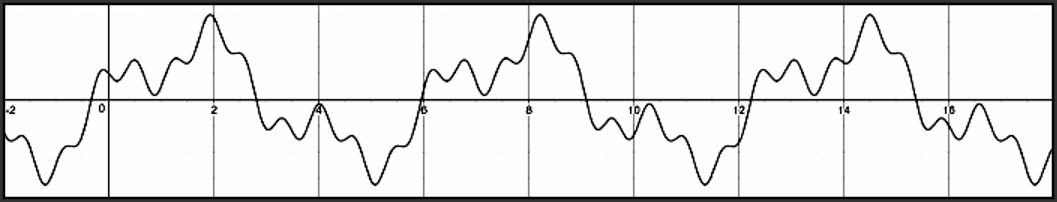

This is a complex wave form that is hard to analyse. However, if this a FT is applied to this wave, the consituent wave can be obtained and their properties observed.


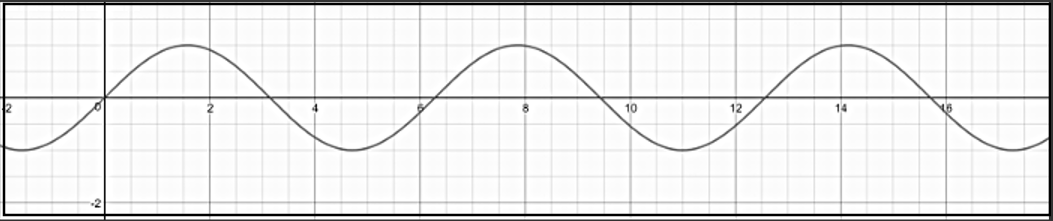



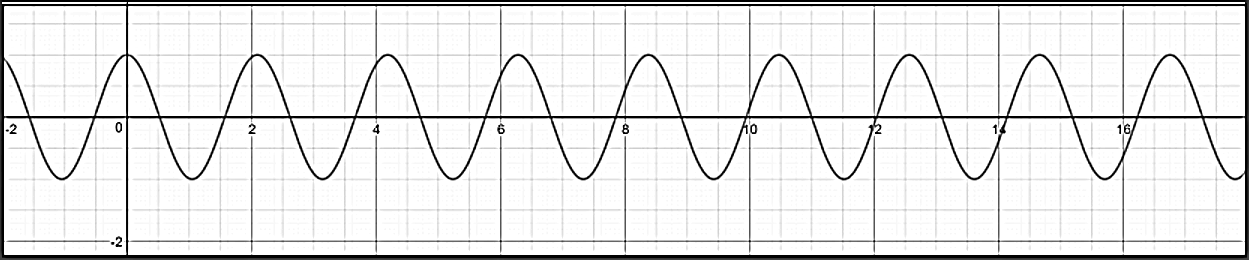




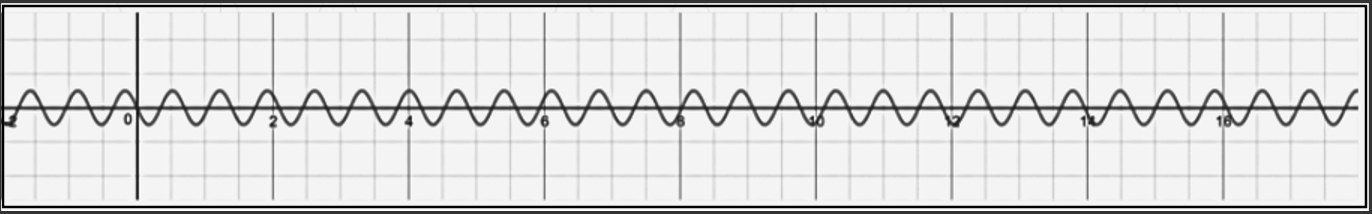

Suppose we have a function defined by $ f(x) = cos(6\pi x) +1$ shown below


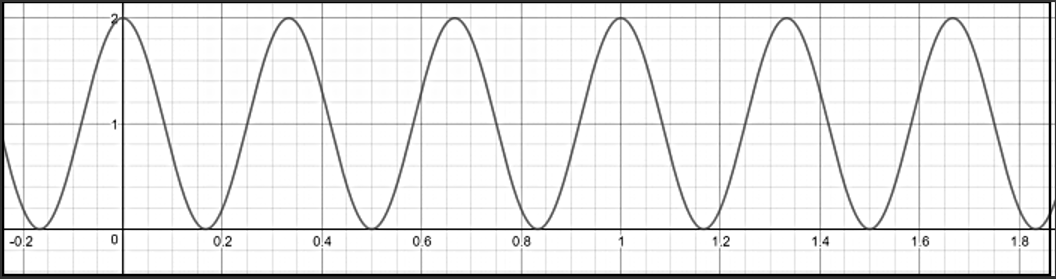

This function has a frequency of 3 rad/s. 

We wrap this function around a circle such that the amplitude remains the same, figure illustrates below.

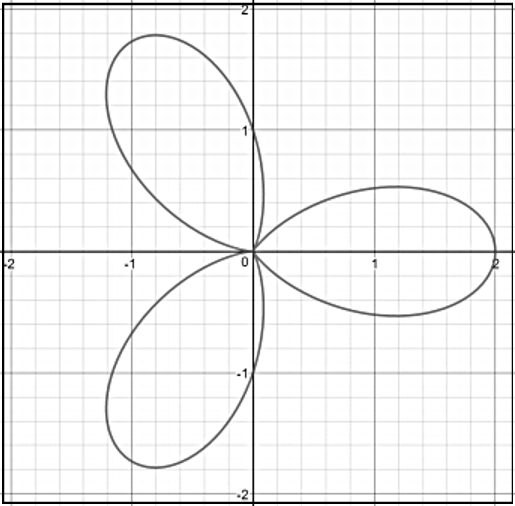

This new graph can be expressed in polar form as $r = cos(-\frac{3}{n}\theta)+1$

If this graph represents a wire, and we want to observe how the center of mass changes in relation to the number of rotations. For 2 rotations per second the graph looks like this:

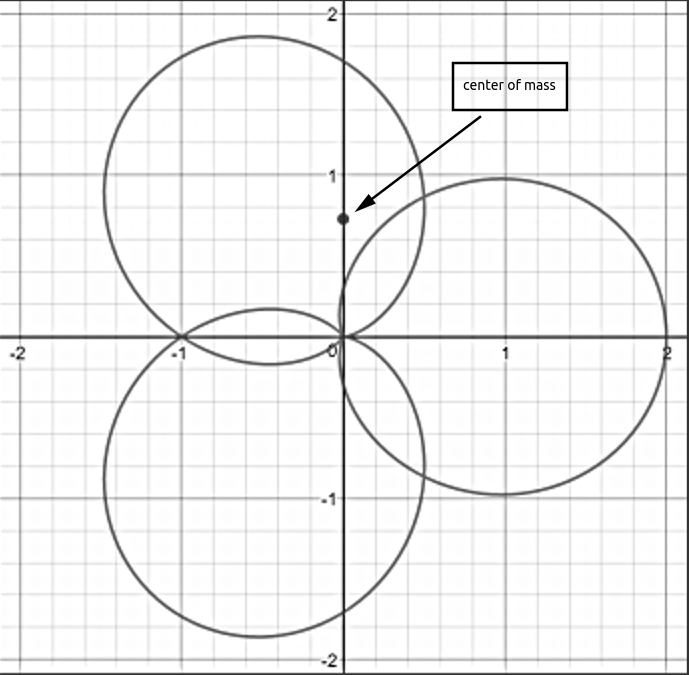


For 3 rotations per second:

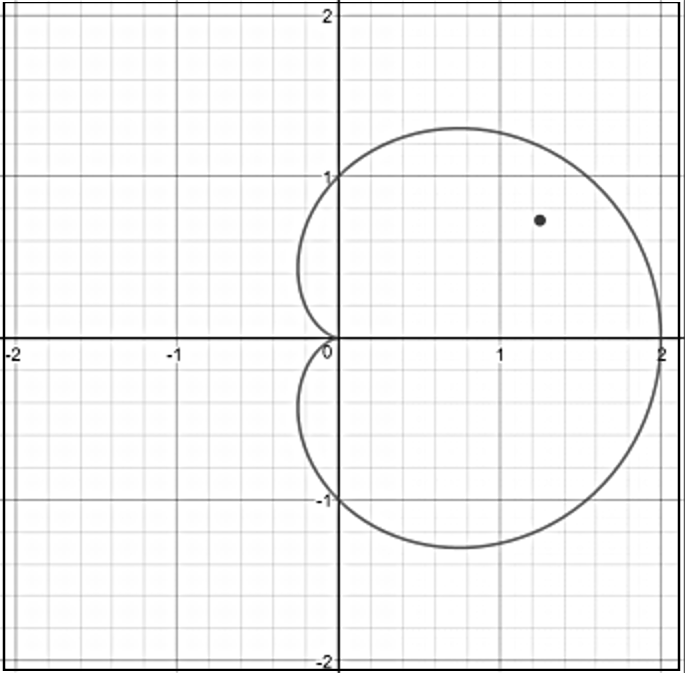

The graph lines up at 3 rads/s. This is becuase the rotation frequency matches the frequency of the function. This is principles of the Fourier Transform. By wrapping the wave around a circle and observing the center of mass, the periodicity of the consituent parts could be observed.

Mathematically this can be expressed using the Euler's formula,  $cos(\theta) + isin(\theta)   = e^{i\theta}$.

This represents a rotation by $\theta$ on the complex unit circle. To represent a clockwise rotation of a certain speed, this can be expressed as: $ e^{-2\pi i st}$.


To wrap a wave $f(t)$ around a circle at a frequency $s$: $f(t)e^{-2\pi i st}$. The center of mass can be obtained by sampling the wave and taking the average: 

$$
\frac{1}{n}\sum\limits_{k=0}^{n} f(t)e^{-2\pi i st} 
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$


By taking enough samples of the function, we get the Fourier transform:

$$
\hat{g(s)} = \int\limits_{t_{1}}^{t_{2}} f(t)e^{-2\pi i st} dt
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$


So if we have the Fourier transform, we can find the inverse using the properties of Fourier transforms.


$$
 f(t) = \int\limits_{\infty}^{\infty} \hat{g(s)} e^{-2\pi i st} dt
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$


The DFT version of this operation is expressed as

$$
y_k = \frac{1}{\sqrt N}\sum\limits_{j=0}^{N-1} x_{j}e^{\frac{2 \pi i k j}{N}}
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$


The QFT is similar to the DFT except the data is a vector with each element in the vector representing a probability. Thus the QFT can be expressed as

$$
 F(\Psi) =\frac{1}{\sqrt N}\sum\limits_{j=0}^{N-1} \Psi_{j}e^{\frac{2 \pi i k j}{N}}
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$



We are now in a position to calculate a QFT. Let's take the 1 qubit state $|\Psi = \alpha|0 \rangle + \beta | 1 \rangle$.


$$
 F(\Psi) =\frac{1}{\sqrt 2}\sum\limits_{j=0}^{1} \Psi_{j}e^{\frac{2 \pi i k j}{2}}
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$

Simplifying yields:


$$
 F(\Psi_{0}) =\frac{\alpha + \beta}{\sqrt 2}
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$

and 

$$
 F(\Psi_{1}) =\frac{\alpha - \beta}{\sqrt 2}
% \begin{pmatrix}
% 1 & 0\\
% 0 & e^{i\varphi}
% \end{pmatrix}
$$

Representing this in matrix for the 1 qubit Fourier results in,

$$
M^{2x2} 
\begin{pmatrix}
\alpha \\
\beta \\
\end{pmatrix}
= \frac{1}{\sqrt 2} 
\begin{pmatrix}
\alpha + \beta\\
\alpha - \beta\\
\end{pmatrix}
$$



Solving for the matrix M yields,

$$
 M =\frac{1}{\sqrt 2}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$


This is the Hadamard matrix. The rotations are equivalent to performing a series of operations of the form $e^{i\theta}$, where $\theta$ takes on different values.

Thus the obtained matrix can be defined as 

$$
 M =\frac{1}{\sqrt 2}
\begin{pmatrix}
e^{0i} & e^{0i}\\
e^{0i} & e^{\pi i}
\end{pmatrix}
$$


Thus, the equation 

 $$
 F(\Psi) =\frac{1}{\sqrt N}\sum\limits_{j=0}^{N-1} \Psi_{j}e^{\frac{2 \pi i k j}{N}}
 $$
 
 represents an N-dimentional matrix representing the QFT!
 

 

By decomposing the matrix into a series of phase rotations, we can identify the phase rotation gate as:

$$
 P(\varphi) =
\begin{pmatrix}
1 & 0\\
0 & e^{\frac{\pi i}{2^\varphi}}
\end{pmatrix}
$$


It can be observed that by combining a number of phase gates with different values of $\varphi$, any rotation around the sphere can be obtained.

This operation can be simplified further by employing a $C_{PHASE(\varphi)}$ gate. If the control bit has a zero probability of being in the state |1\rangle, the target remains the same. This is equivalent to when the exponent factor in the QFT is zero, the coefficient remain unchanged [6,7].


The Quantum Fourier Transform is developed as follows, apply the Hadamard gate on the qubit from n to $0$. With each iteration apply $n-index$ controlled rotation gates with phase of $\frac{\pi}{2^{n-index}}$. The figure below illustrates the Quantum Fourier Transform.



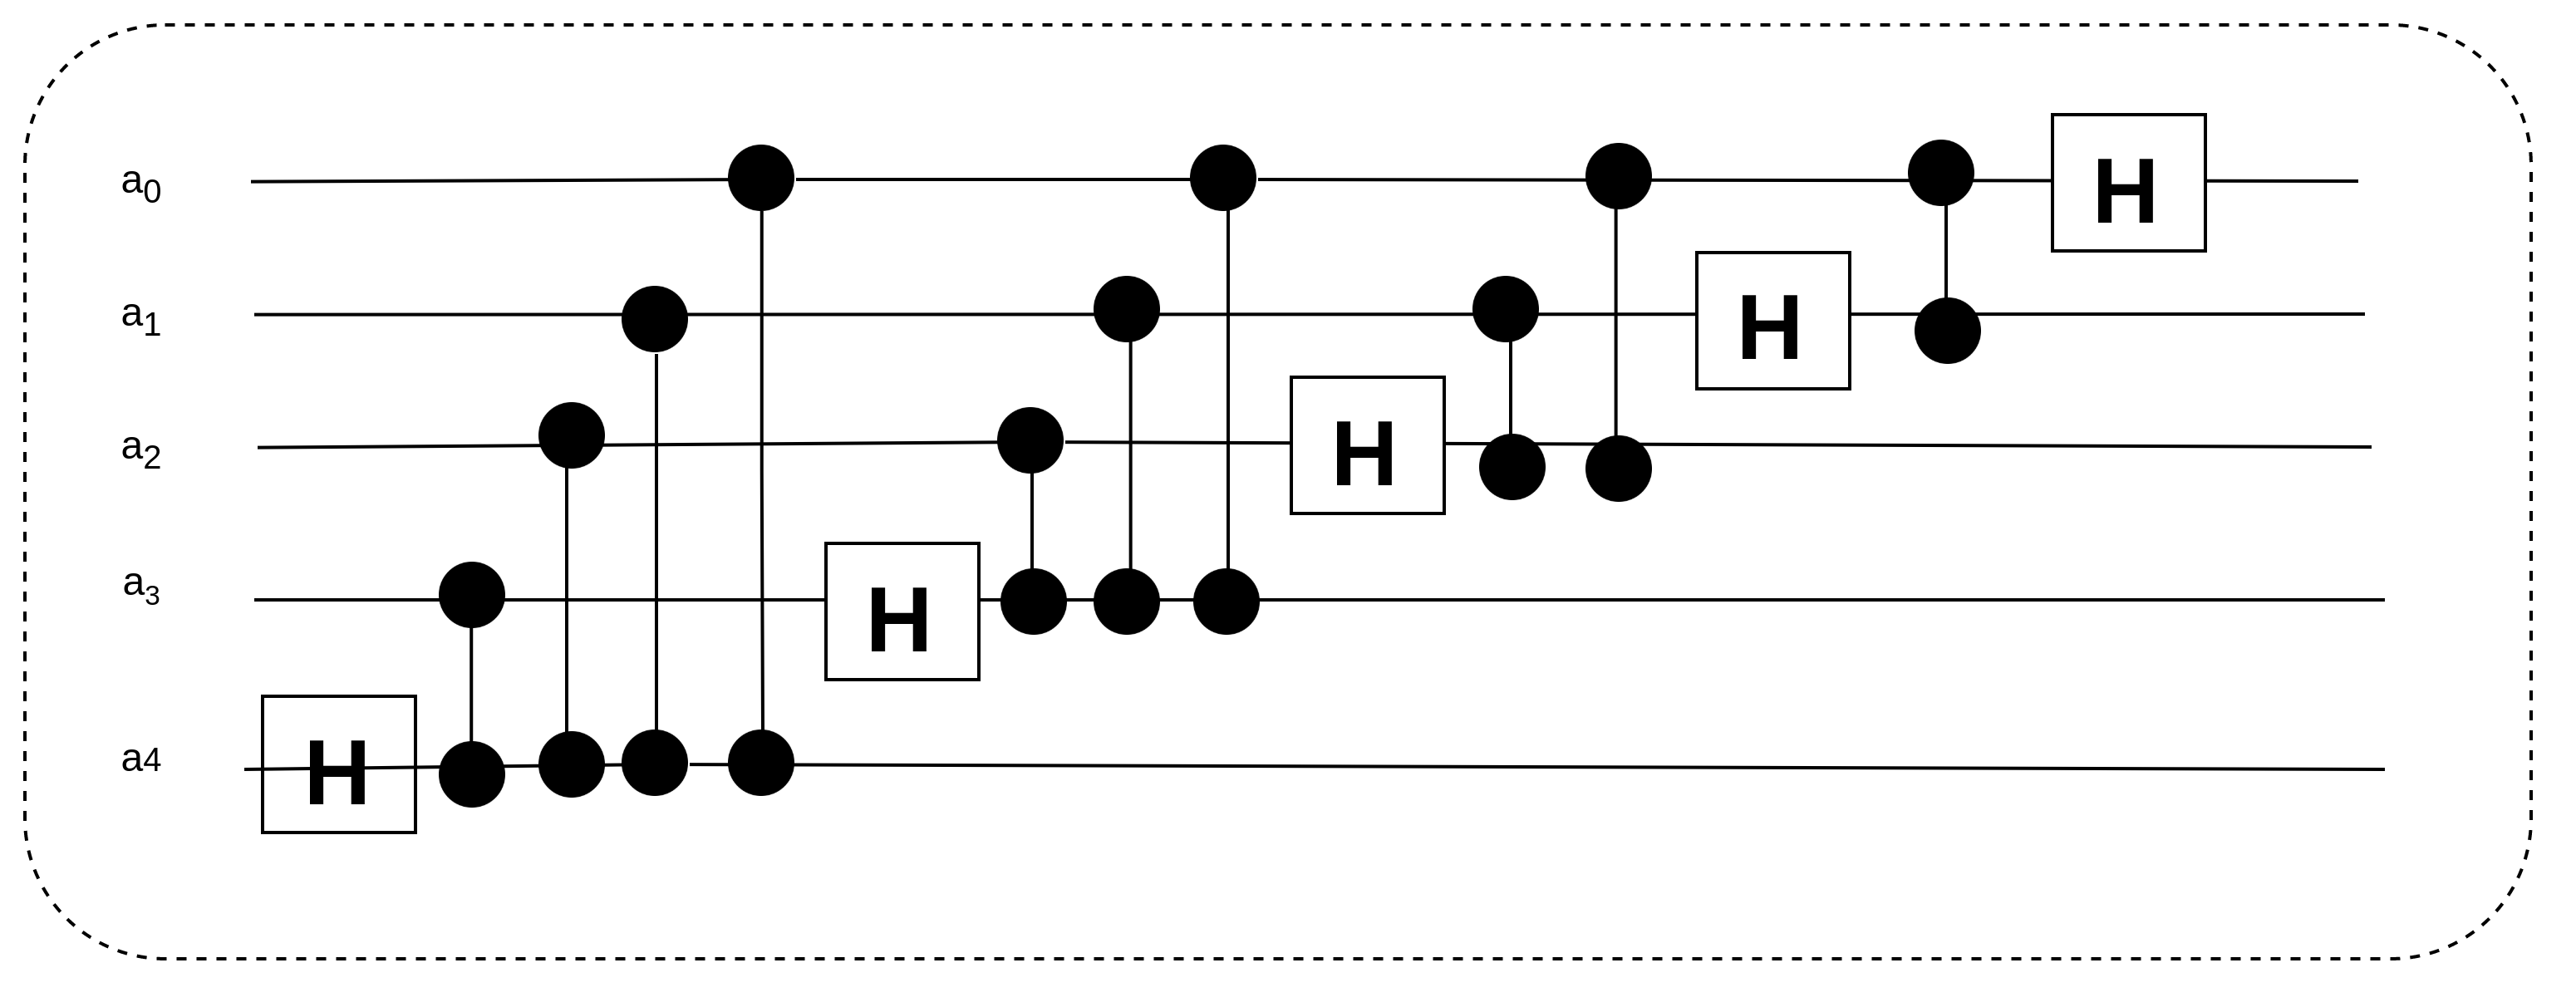



# Conclusion

The quantum algorithm to perform a Quantum Fourier Transform is presented. An attempt to document a computation orientated tutorial is made. The basics of quantum computing are covered. A thorough explaination of the Quantum Fourier Transform should equip the reader to engage the tutorial on the accompanying document. 

# IX. ACKNOWLEDGMENTS

[1] D. Deutsch, Proc. R. Soc. London A 400, 97 (1985).


[2] D. Deutsch and R. Jozsa, Proc. R. Soc. London A 439, 553
(1992); E. Bernstein and U. Vazirani (unpublished); D. S. Simon, in Proceedings of the 35th Annual Symposium on the Foundations of Computer Science, edited by S. Goldwasser (IEEE Computer Society Press, Los Alamitos, CA, 1994).

[3] P. W. Shor, in Proceedings of the 35th Annual Symposium on
the Theory of Computer Science.

[4] A. Barenco, C.H. Bennett, R. Cleve, D. P. DiVicenzo, N. Mar-
golus, P. Shor, T. Sleator, J. Smolin, and H. Weinfurter, Phys.
Rev. A 52, 3457 ~1995!.

[5] R. Wille and R. Drechsler, Towards a Design Flow for Reversible Logic, Springer, Dordrecht, 2010. DOI: 10.1007/978-90-481-9579-4. 10, 56

[6] R. Jozsa, Quantum algorithms, In: D. Bouwmeester, A. Ekert, and A. Zeilinger, The Physics of Quantum Information, Springer Verlag, Berlin, pp. 104–126, 2000. 62

[7] S Anagolum "Arithmetic on Quantum Computers: Addition, Faster" Meduim , 2018

[8] Qiskit.org image